# Feature Selection Techniques in Machine Learning with Python

In [73]:
import numpy as np
import pandas as pd
import matplotlib as splt
import seaborn

In [74]:
df= pd.read_csv(r'C:\Users\shhimel\Desktop\cardio_train.csv',sep=';')

In [75]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [76]:
x= df.drop(['cardio'],axis=1)

In [77]:
y= df.iloc[:,12]

In [78]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [110]:
### Model Import 

In [97]:
from sklearn.feature_selection import SelectKBest, chi2

In [98]:
from sklearn.feature_selection import f_classif

In [84]:
fe_model = SelectKBest(score_func=f_classif)

In [85]:
fe_model.fit(x,y)

SelectKBest()

In [111]:
### 2nd DataFrame to Avg Score Count 

In [99]:
df0= pd.DataFrame(fe_model.scores_,columns=['Avg_Score'])

In [100]:
df0

,Avg_Score
0,1.010461
1,4209.007957
2,4.603641
3,8.197397
4,2388.777887
5,208.339524
6,303.629011
7,3599.361137
8,562.772977
9,16.790541


In [112]:
### 3rd DataFrame for X columns features

In [101]:
df1 = pd.DataFrame(x.columns)

In [115]:
### Concat DataFrame 

In [102]:
All_features = pd.concat([df1,df0],axis=1)

In [103]:
All_features


,0,Avg_Score
0,id,1.010461
1,age,4209.007957
2,gender,4.603641
3,height,8.197397
4,weight,2388.777887
5,ap_hi,208.339524
6,ap_lo,303.629011
7,cholesterol,3599.361137
8,gluc,562.772977
9,smoke,16.790541


In [114]:
### Function for Best Features

In [107]:
All_features.nlargest(8,'Avg_Score')

,0,Avg_Score
1,age,4209.007957
7,cholesterol,3599.361137
4,weight,2388.777887
8,gluc,562.772977
6,ap_lo,303.629011
5,ap_hi,208.339524
11,active,89.091494
9,smoke,16.790541


# Feature Importance Technique

In [116]:
from sklearn.ensemble import ExtraTreesClassifier

In [117]:
model = ExtraTreesClassifier()

In [119]:
model.fit(x,y)

ExtraTreesClassifier()

In [120]:
model.feature_importances_

array([0.16021631, 0.20534867, 0.0065941 , 0.13608799, 0.14698435,
       0.16873272, 0.10483808, 0.04523229, 0.01166273, 0.00437873,
       0.00462321, 0.00530082])

In [121]:
top_fe = pd.Series(model.feature_importances_,index = x.columns)

In [122]:
top_fe


id             0.160216
age            0.205349
gender         0.006594
height         0.136088
weight         0.146984
ap_hi          0.168733
ap_lo          0.104838
cholesterol    0.045232
gluc           0.011663
smoke          0.004379
alco           0.004623
active         0.005301
dtype: float64

<AxesSubplot:>

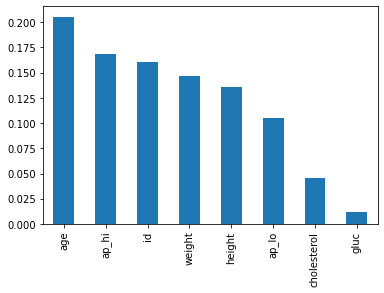

In [126]:
top_fe.nlargest(8).plot(kind='bar')